In [83]:

import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

#We set the objective function and the constraints
def f_0(x,y,lamb):
    terme1=np.linalg.norm(np.dot(x.T,np.dot(np.diag(y),lamb)))**2
    terme2=np.sum(lamb)
    return (terme1-terme2)

def contrainte_1(lamb,C):
    return(-np.sum(np.log(-(lamb-C))))

def contrainte_2(lamb):
    return(-np.sum(np.log(lamb)))

def f(x,y,lamb,C,t):
    for i in range(m):
        if lamb[i]<=0 or lamb[i]>=C:
            raise Exception('Error, Unfeasible point')
    return (t*f_0(x,y,lamb)+contrainte_1(lamb,C)+contrainte_2(lamb))

#We set all the gradients
def grad_f_0(x,y,lamb):
    return(np.diag(y).dot(x).dot(x.T).dot(np.diag(y)).dot(lamb)-np.ones((m,1)))

def grad_c1(lamb,C):
    return(np.ones((m,1))/(C-lamb))

def grad_c2(lamb):
    return(-np.ones((m,1))/lamb)

def grad_f(x,y,lamb,C,t):
    return(t*grad_f_0(x,y,lamb)+grad_c1(lamb,C)+grad_c2(lamb))

#We set all the Hessians 
def Hessienne_f_0(x,y):
    return(np.diag(y).dot(x).dot(x.T).dot(np.diag(y)))

def Hessienne_c1(lamb,C):
    vec=(1/(C-lamb)**2).reshape(m,)
    return(np.diag(vec))

def Hessienne_c2(lamb):
    vec2=(1/(lamb**2)).reshape(m,)
    return(np.diag(vec2))

def Hessienne_f(x,y,lamb,C,t):
    return(t*Hessienne_f_0(x,y)+Hessienne_c1(lamb,C)+Hessienne_c2(lamb))

#We set the parameters
alpha=0.1
beta=0.7

def back_line_search(x,y,lamb,C,t,alpha,beta,delta_v):
    t_bls=1
    j=0
    #We have to make sure the point is feasible and the bakc_line_search condition is satisfied 
    while (lamb+t_bls*delta_v<=0).any() or (lamb+t_bls*delta_v>=C).any() or f(x,y,lamb+t_bls*delta_v,C,t)-0.01>=f(x,y,lamb,C,t)+alpha*t_bls*np.dot(grad_f(x,y,lamb,C,t).T,delta_v):
        t_bls=beta*t_bls
    return(t_bls)

#The algorithm for the centering step, with a precise value of t
def centering_step(x,y,lamb,C,t,eps):
    n_iter=0
    incr=[lamb]
    delta_v=-(np.linalg.inv(Hessienne_f(x,y,lamb,C,t))).dot(grad_f(x,y,lamb,C,t))  
    #The step is chosen with the Newton technic
    lamb2=(grad_f(x,y,lamb,C,t).T.dot(np.linalg.inv(Hessienne_f(x,y,lamb,C,t)))).dot(grad_f(x,y,lamb,C,t))
    while lamb2/2>eps:
            t_bls=back_line_search(x,y,lamb,C,t,alpha,beta,delta_v)
            n_iter+=1
            lamb=lamb+t_bls*delta_v
            incr+=[lamb]
            delta_v=-(np.linalg.inv(Hessienne_f(x,y,lamb,C,t))).dot(grad_f(x,y,lamb,C,t))  
            lamb2=(grad_f(x,y,lamb,C,t).T.dot(np.linalg.inv(Hessienne_f(x,y,lamb,C,t)))).dot(grad_f(x,y,lamb,C,t))
    return(incr, n_iter)


def barrier_method(x,y,lamb,C,eps,mu):
    t=1 
    iterates=[lamb]
    n_iters=[0]
    cpt=0
    while m/t>=eps:
        increment,n_iter=centering_step(x,y,lamb,C,t,eps)
        update=increment[-1]
        lamb=update
        iterates+=[lamb]
        cpt+=n_iter
        n_iters+=[cpt]
        t=mu*t
    return(iterates,n_iters)
    

[]

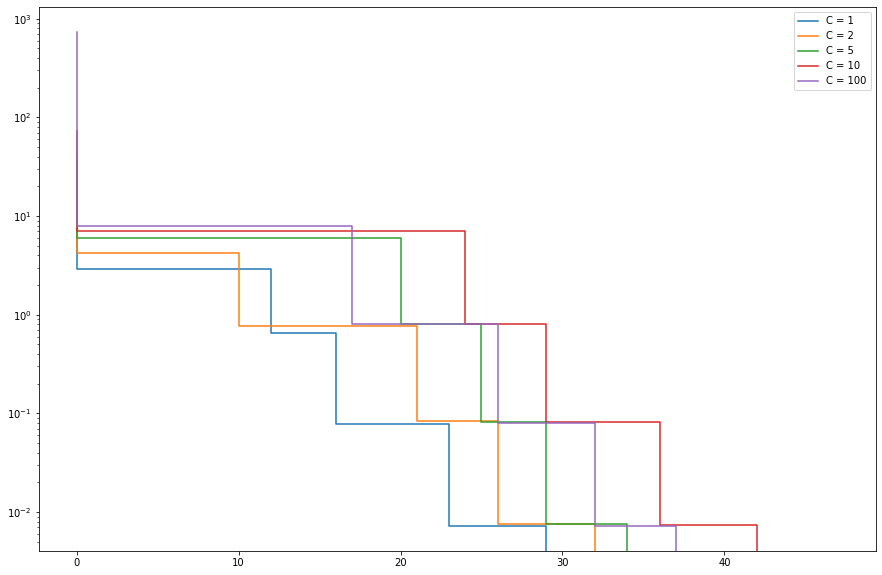

In [86]:
m=10


mean=[-1,1]
cov=np.identity(2)
#We set a seed
np.random.seed(8)

#We generate our data
x = np.random.multivariate_normal(mean, cov, m)

#We set an arbitrary labels vector
y=np.array(([-1,1,1,1,-1,-1,1,1,-1,-1]))

#Initial point
lamb=np.ones((m,1))*0.01
#Precision
eps=0.001
#mu parameter
mu=10

#Then the plots

C_list=np.array([1,2,5,10,100])
plt.figure(figsize=(15,10))
for i in range(len(C_list)):     #We try for different values of C
    C=C_list[i]
    values,nb_iters=barrier_method(x,y,lamb,C,eps,mu)
    #We get the optimum (so the last vector of the list of vector from the barrier function), and the optimal value
    optimum=values[-1]
    optimal_value=f_0(x,y,optimum)
    #We will have an array, with all the distances to the optimum 
    diff=np.zeros(len(nb_iters)) 
    for j in range(len(nb_iters)):
        #Each new j corresponds to a full algorithm of Newton for a fixed t
        value=values[j]
        diff[j]=f_0(x,y,value)-optimal_value
    plt.step(nb_iters,diff,label = 'C = {}'.format(C))
plt.legend()
plt.semilogy()
